<h1>Average Rating By Person by title.Principal Category</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
def replace_Bad_Year(value):
    if len(value) < 4:
        return '1700'
    else:
        return value
    
def binning(col, cut_points, labels=None):
  minval = col.min()
  maxval = col.max()
  break_points = [minval] + cut_points + [maxval]
  if not labels:
    labels = range(len(cut_points)+1)
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

In [3]:
#--------------------------------------------------------
#--  Input File 3:  title.basics.tsv
#--------------------------------------------------------
print('Reading title.basics.tsv')
titleBasics = pd.read_csv("./Data/title.basics.tsv/data.tsv", sep='\t',dtype={"tconst": object, "titleType": object, "primaryTitle": object, "originalTitle": object, "isAdult": object, "startYear": object})
print('Complete - 3 of 7')
titleBasics = titleBasics[(titleBasics.isAdult == "0") & (titleBasics.titleType == 'movie')]
print('cleanup of startYear')
titleBasics['startYear'] = titleBasics.apply(lambda x: replace_Bad_Year(x['startYear']), axis=1)
titleBasics['startYear']= titleBasics.startYear.astype(int)
titleBasics.head(5)

Reading title.basics.tsv
Complete - 3 of 7
cleanup of startYear


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
145,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,20,"Documentary,News,Sport"
332,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900,\N,\N,"Biography,Drama"
499,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
571,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Biography,Crime,Drama"


In [4]:
#--------------------------------------------------------
#--  Input File 6:  title.principals.tsv
#--------------------------------------------------------
print('Reading title.principals.tsv')
titlePrincipals = pd.read_csv("./Data/title.principals.tsv/data.tsv", sep='\t')
print('Complete - 6 of 7')
titlePrincipals.head(5)


Reading title.principals.tsv
Complete - 6 of 7


,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Herself""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


In [5]:
#--------------------------------------------------------
#--  Input File 7:  title.ratings.tsv
#--------------------------------------------------------
print('Reading title.ratings.tsv')
titleRatings = pd.read_csv("./Data/title.ratings.tsv/data.tsv", sep='\t',dtype={"tconst": object, "averageRating": float, "numVotes": int})
print('Complete - 7 of 7')
titleRatings.numVotes.astype(int)
print('mean: ',titleRatings.numVotes.mean())
print('mode: ',titleRatings.numVotes.mode())
print('max: ',titleRatings.numVotes.max())
cut_points = [150,978,25000,100000,200000,400000,800000,1000000]
labels = ["low","medium","high","very high","100000","200000","400000","800000","HUGE"]
titleRatings["myVoteVolume"] = binning(titleRatings["numVotes"], cut_points, labels)

titleRatings.head(5)


Reading title.ratings.tsv
Complete - 7 of 7
mean:  978.3574526334341
mode:  0    5
dtype: int32
max:  1971974


,tconst,averageRating,numVotes,myVoteVolume
0,tt0000001,5.8,1389,high
1,tt0000002,6.5,163,medium
2,tt0000003,6.6,978,medium
3,tt0000004,6.4,98,low
4,tt0000005,6.2,1671,high


<h3>merge data</h3>

In [6]:
myData = pd.merge(titlePrincipals, titleRatings, left_on = 'tconst', right_on = 'tconst', how='inner')
myData = pd.merge(myData, titleBasics, left_on = 'tconst', right_on = 'tconst', how='left')
myData.head(5)

,tconst,ordering,nconst,category,job,characters,averageRating,numVotes,myVoteVolume,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,1,nm1588970,self,\N,"[""Herself""]",5.8,1389,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0000001,2,nm0005690,director,\N,\N,5.8,1389,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N,5.8,1389,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0000002,1,nm0721526,director,\N,\N,6.5,163,medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0000002,2,nm1335271,composer,\N,\N,6.5,163,medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h3>aggregate ratings by name by title.Principal category</h3>

In [7]:
#df2 = myData.groupby(['nconst', 'startYear','category'], as_index=False)['averageRating'].mean()
ratingsByPersonByCategory = myData.groupby(['nconst', 'category'], as_index=False)['averageRating'].mean()
ratingsByPersonByCategory.head(5)

,nconst,category,averageRating
0,nm0000001,actor,7.020833
1,nm0000001,archive_footage,7.107143
2,nm0000001,self,7.608163
3,nm0000002,actress,7.052381
4,nm0000002,archive_footage,7.564103


<h1>Read Title Principals Categories</h1>

<h3>place each category from titlePrincipals into a dataframe</h3>

In [8]:
myActors = titlePrincipals[(titlePrincipals.category == 'actor') | (titlePrincipals.category == 'self') | (titlePrincipals.category == 'actress')]
myDirectors = titlePrincipals[titlePrincipals.category == 'director']
myProducers = titlePrincipals[titlePrincipals.category == 'producer']
myWriters = titlePrincipals[titlePrincipals.category == 'writer']
myComposers = titlePrincipals[titlePrincipals.category == 'composer']
myCinematographers = titlePrincipals[titlePrincipals.category == 'cinematographer']
myEditors = titlePrincipals[titlePrincipals.category == 'editor']

<h3>place each category from aggregated rating into a dataframe</h3>

In [9]:
actorRatings = ratingsByPersonByCategory[(ratingsByPersonByCategory.category == 'actor') | (ratingsByPersonByCategory.category == 'self') | (ratingsByPersonByCategory.category == 'actress')]
producerRatings = ratingsByPersonByCategory[ratingsByPersonByCategory.category == 'producer'] 
writerRatings = ratingsByPersonByCategory[ratingsByPersonByCategory.category == 'writer']
directorRatings = ratingsByPersonByCategory[ratingsByPersonByCategory.category == 'director']
composerRatings = ratingsByPersonByCategory[ratingsByPersonByCategory.category == 'composer']
cinematographerRatings = ratingsByPersonByCategory[ratingsByPersonByCategory.category == 'cinematographer']
editorRatings = ratingsByPersonByCategory[ratingsByPersonByCategory.category == 'editor']

<h3>merge title.Ratings with each title.Principals dataframe</h3>

In [10]:
myDataActors = pd.merge(titleRatings, myActors, left_on = 'tconst', right_on = 'tconst', how='inner')
myDataProducers = pd.merge(titleRatings, myProducers, left_on = 'tconst', right_on = 'tconst', how='inner')
myDataWriters = pd.merge(titleRatings, myWriters, left_on = 'tconst', right_on = 'tconst', how='inner')
myDataDirectors = pd.merge(titleRatings, myDirectors, left_on = 'tconst', right_on = 'tconst', how='inner')
myDataComposers = pd.merge(titleRatings, myComposers, left_on = 'tconst', right_on = 'tconst', how='inner')
myDataCinematographers = pd.merge(titleRatings, myCinematographers, left_on = 'tconst', right_on = 'tconst', how='inner')
myDataEditors = pd.merge(titleRatings, myEditors, left_on = 'tconst', right_on = 'tconst', how='inner')

<h3>actors</h3>

In [11]:
myDataActors = pd.merge(myDataActors, actorRatings, left_on = 'nconst', right_on = 'nconst', how='left')
myDataActors.head(10)

,tconst,averageRating_x,numVotes,myVoteVolume,ordering,nconst,category_x,job,characters,category_y,averageRating_y
0,tt0000001,5.8,1389,high,1,nm1588970,self,\N,"[""Herself""]",self,5.80
1,tt0000005,6.2,1671,high,1,nm0443482,actor,\N,"[""Blacksmith""]",actor,6.20
2,tt0000005,6.2,1671,high,2,nm0653042,actor,\N,"[""Assistant""]",actor,6.20
3,tt0000007,5.5,562,medium,1,nm0179163,actor,\N,\N,actor,4.30
4,tt0000007,5.5,562,medium,1,nm0179163,actor,\N,\N,self,5.60
5,tt0000007,5.5,562,medium,2,nm0183947,actor,\N,\N,actor,5.50
6,tt0000008,5.6,1497,high,1,nm0653028,actor,\N,"[""Sneezing Man""]",actor,5.60
7,tt0000008,5.6,1497,high,1,nm0653028,actor,\N,"[""Sneezing Man""]",self,5.85
8,tt0000009,5.5,66,low,1,nm0063086,actress,\N,"[""Miss Geraldine Holbrook (Miss Jerry)""]",actress,5.50
9,tt0000009,5.5,66,low,2,nm0183823,actor,\N,"[""Mr. Hamilton""]",actor,6.05


In [12]:
myDataActors.rename(
   { 'averageRating_y':'myActor_averageRating',
     'averageRating_x':'averageRating'
     },
    axis=1 ,
    inplace=True
    )

actorRollup = myDataActors.groupby(['tconst'], as_index=False)['myActor_averageRating'].mean()
actorRollup.head(5)

,tconst,myActor_averageRating
0,tt0000001,5.800000
1,tt0000005,6.200000
2,tt0000007,5.133333
3,tt0000008,5.725000
4,tt0000009,5.683333


<h3>producers</h3>

In [13]:
myDataProducers = pd.merge(myDataProducers, producerRatings, left_on = 'nconst', right_on = 'nconst', how='left')
myDataProducers.head(10)

,tconst,averageRating_x,numVotes,myVoteVolume,ordering,nconst,category_x,job,characters,category_y,averageRating_y
0,tt0000003,6.6,978,medium,2,nm5442194,producer,producer,\N,producer,6.600000
1,tt0000005,6.2,1671,high,4,nm0249379,producer,producer,\N,producer,5.390909
2,tt0000007,5.5,562,medium,5,nm0249379,producer,producer,\N,producer,5.390909
3,tt0000020,5.0,226,medium,2,nm0666972,producer,producer,\N,producer,5.580519
4,tt0000024,5.8,19,low,4,nm0666972,producer,producer,\N,producer,5.580519
5,tt0000025,4.8,18,low,2,nm0666972,producer,producer,\N,producer,5.580519
6,tt0000039,4.6,11,low,1,nm0666972,producer,producer,\N,producer,5.580519
7,tt0000041,6.7,1158,high,2,nm0525908,producer,producer,\N,producer,5.318317
8,tt0000061,4.5,11,low,3,nm0666972,producer,producer,\N,producer,5.580519
9,tt0000089,6.3,669,medium,3,nm0525910,producer,producer,\N,producer,5.289412


In [14]:
myDataProducers.rename(
   {'averageRating_y':'myProducer_averageRating',
     'averageRating_x':'averageRating'
     },
    axis=1 ,
    inplace=True
    )

producerRollup = myDataProducers.groupby(['tconst'], as_index=False)['myProducer_averageRating'].mean()
producerRollup.head(5)

,tconst,myProducer_averageRating
0,tt0000003,6.600000
1,tt0000005,5.390909
2,tt0000007,5.390909
3,tt0000020,5.580519
4,tt0000024,5.580519


<h3>writers</h3>

In [15]:
myDataWriters = pd.merge(myDataWriters, writerRatings, left_on = 'nconst', right_on = 'nconst', how='left')
myDataWriters.head(5)

,tconst,averageRating_x,numVotes,myVoteVolume,ordering,nconst,category_x,job,characters,category_y,averageRating_y
0,tt0000036,4.5,406,medium,3,nm0410331,writer,"story ""Rip Van Winkle""",\N,writer,6.112195
1,tt0000076,4.5,368,medium,3,nm0410331,writer,"story ""Rip Van Winkle""",\N,writer,6.112195
2,tt0000108,4.5,375,medium,3,nm0410331,writer,"story ""Rip Van Winkle""",\N,writer,6.112195
3,tt0000109,4.6,368,medium,3,nm0410331,writer,"story ""Rip Van Winkle""",\N,writer,6.112195
4,tt0000110,4.5,374,medium,3,nm0410331,writer,"story ""Rip Van Winkle""",\N,writer,6.112195


In [16]:
myDataWriters.rename(
   {'averageRating_y':'myWriter_averageRating',
     'averageRating_x':'averageRating'
     },
    axis=1 ,
    inplace=True
    )
writerRollup = myDataWriters.groupby(['tconst'], as_index=False)['myWriter_averageRating'].mean()
writerRollup.head(5)

,tconst,myWriter_averageRating
0,tt0000036,6.112195
1,tt0000076,6.112195
2,tt0000108,6.112195
3,tt0000109,6.112195
4,tt0000110,6.112195


<h3>directors</h3>

In [17]:
myDataDirectors = pd.merge(myDataDirectors, directorRatings, left_on = 'nconst', right_on = 'nconst', how='left')
myDataDirectors.head(5)

,tconst,averageRating_x,numVotes,myVoteVolume,ordering,nconst,category_x,job,characters,category_y,averageRating_y
0,tt0000001,5.8,1389,high,2,nm0005690,director,\N,\N,director,5.383784
1,tt0000002,6.5,163,medium,1,nm0721526,director,\N,\N,director,6.133333
2,tt0000003,6.6,978,medium,1,nm0721526,director,\N,\N,director,6.133333
3,tt0000004,6.4,98,low,1,nm0721526,director,\N,\N,director,6.133333
4,tt0000005,6.2,1671,high,3,nm0005690,director,\N,\N,director,5.383784


In [18]:
myDataDirectors.rename(
   {'averageRating_y':'myDirector_averageRating',
     'averageRating_x':'averageRating'
     },
    axis=1 ,
    inplace=True
    )

directorRollup = myDataDirectors.groupby(['tconst'], as_index=False)['myDirector_averageRating'].mean()
directorRollup.head(5)

,tconst,myDirector_averageRating
0,tt0000001,5.383784
1,tt0000002,6.133333
2,tt0000003,6.133333
3,tt0000004,6.133333
4,tt0000005,5.383784


<h3>composers</h3>

In [19]:
myDataComposers = pd.merge(myDataComposers, composerRatings, left_on = 'nconst', right_on = 'nconst', how='left')
myDataComposers.head(5)

,tconst,averageRating_x,numVotes,myVoteVolume,ordering,nconst,category_x,job,characters,category_y,averageRating_y
0,tt0000002,6.5,163,medium,2,nm1335271,composer,\N,\N,composer,6.500000
1,tt0000003,6.6,978,medium,3,nm1335271,composer,\N,\N,composer,6.500000
2,tt0000004,6.4,98,low,2,nm1335271,composer,\N,\N,composer,6.500000
3,tt0000229,4.7,56,low,3,nm0595213,composer,\N,\N,composer,6.090909
4,tt0000247,5.0,339,medium,8,nm6114857,composer,\N,\N,composer,5.000000


In [20]:
myDataComposers.rename(
   {'averageRating_y':'myComposer_averageRating',
     'averageRating_x':'averageRating'
     },
    axis=1 ,
    inplace=True
    )

composerRollup = myDataComposers.groupby(['tconst'], as_index=False)['myComposer_averageRating'].mean()
composerRollup.head(5)

,tconst,myComposer_averageRating
0,tt0000002,6.500000
1,tt0000003,6.500000
2,tt0000004,6.500000
3,tt0000229,6.090909
4,tt0000247,5.000000


<h3>cinematographer</h3>

In [21]:
myDataCinematographers = pd.merge(myDataCinematographers, cinematographerRatings, left_on = 'nconst', right_on = 'nconst', how='left')
myDataCinematographers.head(5)

,tconst,averageRating_x,numVotes,myVoteVolume,ordering,nconst,category_x,job,characters,category_y,averageRating_y
0,tt0000001,5.8,1389,high,3,nm0374658,cinematographer,director of photography,\N,cinematographer,5.403390
1,tt0000008,5.6,1497,high,3,nm0374658,cinematographer,\N,\N,cinematographer,5.403390
2,tt0000036,4.5,406,medium,4,nm0005658,cinematographer,\N,\N,cinematographer,5.481982
3,tt0000052,4.4,34,low,2,nm1729239,cinematographer,\N,\N,cinematographer,5.294737
4,tt0000060,8.1,57,low,2,nm0005658,cinematographer,\N,\N,cinematographer,5.481982


In [22]:
myDataCinematographers.rename(
   {'averageRating_y':'myCinematographer_averageRating',
     'averageRating_x':'averageRating'
     },
    axis=1 ,
    inplace=True
    )

cinematographerRollup = myDataCinematographers.groupby(['tconst'], as_index=False)['myCinematographer_averageRating'].mean()
cinematographerRollup.head(5)

,tconst,myCinematographer_averageRating
0,tt0000001,5.403390
1,tt0000008,5.403390
2,tt0000036,5.481982
3,tt0000052,5.294737
4,tt0000060,5.481982


<h3>editor</h3>

In [23]:
myDataEditors = pd.merge(myDataEditors, editorRatings, left_on = 'nconst', right_on = 'nconst', how='left')
myDataEditors.head(5)

,tconst,averageRating_x,numVotes,myVoteVolume,ordering,nconst,category_x,job,characters,category_y,averageRating_y
0,tt0000003,6.6,978,medium,4,nm5442200,editor,\N,\N,editor,6.600000
1,tt0000832,6.7,1781,high,9,nm0808571,editor,\N,\N,editor,6.664103
2,tt0002126,6.4,34,low,8,nm1589732,editor,\N,\N,editor,6.400000
3,tt0002126,6.4,34,low,9,nm1589746,editor,\N,\N,editor,6.400000
4,tt0003854,5.6,9,low,8,nm0266933,editor,\N,\N,editor,7.291736


In [24]:
myDataEditors.rename(
   {'averageRating_y':'myEditor_averageRating',
     'averageRating_x':'averageRating'
     },
    axis=1 ,
    inplace=True
    )

editorRollup = myDataEditors.groupby(['tconst'], as_index=False)['myEditor_averageRating'].mean()
editorRollup.head(5)

,tconst,myEditor_averageRating
0,tt0000003,6.600000
1,tt0000832,6.664103
2,tt0002126,6.400000
3,tt0003854,7.291736
4,tt0003863,6.000000


<h3>merge data to produce average ratings by movie for each category</h3>

<h3>filter by date range</h3>

In [25]:
titleBasics = titleBasics[(titleBasics.isAdult == "0") & (titleBasics.titleType == 'movie') & (titleBasics.startYear >= 1920)]

<h3>use left outer joins to merge data to title.Ratings</h3>
<h4>this gives us a roll up of the average rating on each movie by category of all title.Principals associated to the movie</h4>

In [26]:
myData = pd.merge (titleBasics, titleRatings,left_on = ['tconst'], right_on = ['tconst'], how='inner')
myData = pd.merge(myData, actorRollup, left_on = ['tconst'], right_on = ['tconst'], how='inner')
myData = pd.merge(myData, producerRollup, left_on = ['tconst'], right_on = ['tconst'], how='inner')
myData = pd.merge(myData, writerRollup, left_on = ['tconst'], right_on = ['tconst'], how='inner')
myData = pd.merge(myData, directorRollup, left_on = ['tconst'], right_on = ['tconst'], how='inner')
myData = pd.merge(myData, composerRollup, left_on = ['tconst'], right_on = ['tconst'], how='left')
myData = pd.merge(myData, cinematographerRollup, left_on = ['tconst'], right_on = ['tconst'], how='left')
myData = pd.merge(myData, editorRollup, left_on = ['tconst'], right_on = ['tconst'], how='left')

<h3>determine if we have produced any strong relationships to averageRating</h3>

In [27]:
myCorr = myData.corr()
myCorr = myCorr.drop(['startYear','numVotes','myActor_averageRating','myProducer_averageRating','myWriter_averageRating','myDirector_averageRating','myComposer_averageRating','myCinematographer_averageRating','myEditor_averageRating' ],axis = 1)
myCorr = myCorr.sort_values(by='averageRating', ascending=False)
myCorr

,averageRating
averageRating,1.000000
myWriter_averageRating,0.753385
myProducer_averageRating,0.745288
myDirector_averageRating,0.650298
myActor_averageRating,0.625195
myEditor_averageRating,0.593441
myComposer_averageRating,0.558371
myCinematographer_averageRating,0.521155
numVotes,0.120310
startYear,-0.083523


In [28]:
myData.count()

tconst                             72894
titleType                          72894
primaryTitle                       72894
originalTitle                      72894
isAdult                            72894
startYear                          72894
endYear                            72894
runtimeMinutes                     72894
genres                             72894
averageRating                      72894
numVotes                           72894
myVoteVolume                       72894
myActor_averageRating              72894
myProducer_averageRating           72894
myWriter_averageRating             72894
myDirector_averageRating           72894
myComposer_averageRating           48192
myCinematographer_averageRating    41333
myEditor_averageRating             19152
dtype: int64

<h3>remove outliers</h3>

In [29]:
def remove_outliers(dataframe, column):
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return dataframe[(dataframe[column] >= lower) &
                     (dataframe[column] <= upper)].copy()

myData_no_outliers = myData
myData_no_outliers = remove_outliers(myData_no_outliers, "myActor_averageRating")
myData_no_outliers = remove_outliers(myData_no_outliers, "myProducer_averageRating")
myData_no_outliers = remove_outliers(myData_no_outliers, "myDirector_averageRating")
myData_no_outliers = remove_outliers(myData_no_outliers, "myWriter_averageRating")
#myData_no_outliers = remove_outliers(myData_no_outliers, "myEditor_averageRating")
#myData_no_outliers = remove_outliers(myData_no_outliers, "myComposer_averageRating")
#myData_no_outliers = remove_outliers(myData_no_outliers, "myCinematographer_averageRating")

In [30]:
myCorr_no_outliers = myData_no_outliers.corr()
myCorr_no_outliers = myCorr_no_outliers.drop(['numVotes','myActor_averageRating','myProducer_averageRating','myWriter_averageRating','myDirector_averageRating','myComposer_averageRating','myCinematographer_averageRating','myEditor_averageRating' ],axis = 1)
myCorr_no_outliers = myCorr_no_outliers.sort_values(by='averageRating', ascending=False)
myCorr_no_outliers

,startYear,averageRating
averageRating,-0.052837,1.000000
myWriter_averageRating,-0.027670,0.626350
myProducer_averageRating,-0.030282,0.620878
myDirector_averageRating,0.017813,0.496027
myActor_averageRating,0.047335,0.474976
myEditor_averageRating,0.079467,0.457262
myComposer_averageRating,0.030427,0.438334
myCinematographer_averageRating,0.047822,0.384203
numVotes,0.093987,0.136203
startYear,1.000000,-0.052837


In [31]:
myData_no_outliers.count()

tconst                             64648
titleType                          64648
primaryTitle                       64648
originalTitle                      64648
isAdult                            64648
startYear                          64648
endYear                            64648
runtimeMinutes                     64648
genres                             64648
averageRating                      64648
numVotes                           64648
myVoteVolume                       64648
myActor_averageRating              64648
myProducer_averageRating           64648
myWriter_averageRating             64648
myDirector_averageRating           64648
myComposer_averageRating           42655
myCinematographer_averageRating    36587
myEditor_averageRating             16740
dtype: int64

In [32]:
#myData.to_csv('myData.csv')
myData.head(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,myVoteVolume,myActor_averageRating,myProducer_averageRating,myWriter_averageRating,myDirector_averageRating,myComposer_averageRating,myCinematographer_averageRating,myEditor_averageRating
0,tt0005076,movie,Charley's Aunt,Charley's Aunt,0,1925,\N,80,Comedy,6.7,37,low,6.203211,6.413208,6.435604,6.566667,6.009677,NaN,NaN
1,tt0008933,movie,Die Brüder Karamasoff,Die Brüder Karamasoff,0,1921,\N,70,Drama,9.0,8,low,6.998206,7.450000,6.916239,6.986830,NaN,6.740000,NaN
2,tt0009771,movie,A víg özvegy,A víg özvegy,0,1920,\N,70,Musical,5.2,12,low,5.475000,5.200000,7.052070,6.070588,6.150000,6.597297,NaN
3,tt0010058,movie,The Deadlier Sex,The Deadlier Sex,0,1920,\N,60,"Comedy,Drama",6.9,8,low,6.377161,6.900000,6.345175,6.983333,NaN,6.050000,NaN
4,tt0010764,movie,Theodora,Teodora,0,1921,\N,\N,Drama,9.2,9,low,8.838889,5.505556,7.208571,9.200000,NaN,8.250000,NaN


<h1>Modeling</h1>

<h2>sklearn.linear_model - LinearRegression</h2>

In [33]:
myData = myData.drop(['titleType','primaryTitle','originalTitle','isAdult','startYear','endYear','runtimeMinutes','genres','myVoteVolume','numVotes','tconst','myComposer_averageRating','myCinematographer_averageRating','myEditor_averageRating'],axis = 1)
myData.to_csv('./myData/myDataToModel.csv')

In [34]:
myData.head(5)

,averageRating,myActor_averageRating,myProducer_averageRating,myWriter_averageRating,myDirector_averageRating
0,6.7,6.203211,6.413208,6.435604,6.566667
1,9.0,6.998206,7.450000,6.916239,6.986830
2,5.2,5.475000,5.200000,7.052070,6.070588
3,6.9,6.377161,6.900000,6.345175,6.983333
4,9.2,8.838889,5.505556,7.208571,9.200000


0.6871133829470683 The best possible score is 1.0


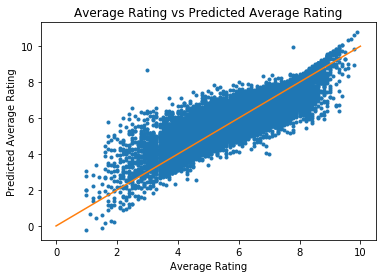

In [35]:
import matplotlib.pyplot as plt

#dataset = myData_no_outliers
dataset = myData

X = dataset.drop(['averageRating'],axis = 1)
#X = dataset.drop(['averageRating','myVoteVolume','numVotes','tconst'],axis = 1)
y = dataset['averageRating']

#print('\n\n',X.dtypes)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.33)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)##,y_test)
print(regressor.score(X, y, sample_weight=None), 'The best possible score is 1.0')

    
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)

#ytest.to_csv('./myData/y_test.csv')

#plt.scatter(y_test,y_pred)
#plt.xlabel("Average Rating")
#plt.ylabel("Predicted Average Rating")
#plt.title("Average Rating vs Predicted Average Rating")

plt.plot(y_test, y_pred, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 10, 500,endpoint=True)
y = x
plt.xlabel("Average Rating")
plt.ylabel("Predicted Average Rating")
plt.title("Average Rating vs Predicted Average Rating")
plt.plot(x, y)
plt.show()

In [36]:
# check that the coeffients are the expected ones.
#m = regressor.coef_[0]
#b = regressor.intercept_
#print(' y = {0} * x + {1}'.format(m, b))

#import matplotlib.pyplot as plt
#max_x = max(X)
#min_x = min(X)
# now we are going to plot the points and the model obtained
#plt.scatter(x_test, y_test, color='blue')  # you can use test_data_X and test_data_Y instead.
#plt.plot([min_x, max_x], [b, m*max_x + b], 'r')
#plt.title('Fitted linear regression', fontsize=16)
#plt.xlabel('x', fontsize=13)
#plt.ylabel('y', fontsize=13)

In [37]:
import numpy as np
# The mean squared error
print("Mean squared error: %.2f" % np.mean((regressor.predict(x_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regressor.score(x_test, y_test))

Mean squared error: 0.46
Variance score: 0.69


<h2>Predict Future Results</h2>

In [38]:
#def predictRating(regressor, actor, producer, writer, director):
#    return regressor.predict([[actor,producer,writer,director]])

#futureData_all = pd.read_csv('./myData/futureDataToPredict.csv')
#futureData = futureData_all
       
#for index, row in futureData.iterrows():
#    calcRating = predictRating(regressor, row['myActor_averageRating'], row['myProducer_averageRating'],row['myWriter_averageRating'],row['myDirector_averageRating'])
#    #futureData.set_value(index,'myAverageRatingPrediction_LR', calcRating)
#    futureData.at[index,'myAverageRatingPrediction_LR'] = calcRating     

#print(futureData.head(10))

In [39]:
#dataframe = myData

# Compare Algorithms
#import pandas
#import matplotlib.pyplot as plt
#from sklearn import model_selection
#from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC
# load dataset
#url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
#names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
#names = ['averageRating','myActor_averageRating','myProducer_averageRating','myWriter_averageRating','myDirector_averageRating']
#dataframe = pandas.read_csv(url, names=names)
#dataframe = pandas.read_csv('./myData/myDataToModel.csv', names=names)
#array = dataframe.values
#X = array[:,0:8]
#X = array[:,0:4]
#Y = array[:,8]
#Y = array[:,4]

#X = X
#Y = y

# prepare configuration for cross validation test harness
#seed = 8
# prepare models
#models = []
#models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))

print('all done')


all done


In [40]:
# evaluate each model in turn
#results = []
#names = []
#scoring = 'accuracy'
#print('here')
#for name, model in models:
#    print('start')
#    kfold = model_selection.KFold(n_splits=10, random_state=seed)
#    print('1')
#    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
#    print('2')
#    results.append(cv_results)
#    print('3')
#    names.append(name)
#    print('4')
#    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#    print('5',msg)
    
print('all done')  

all done


In [41]:
# boxplot algorithm comparison
#fig = plt.figure()
#fig.suptitle('Algorithm Comparison')
#ax = fig.add_subplot(111)
#plt.boxplot(results)
#ax.set_xticklabels(names)
#plt.show()

print('all done')

all done
